# 1.Data pre-processing – Perform all necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

In [2]:
import numpy as np
import pandas as pd
import math
from sklearn import model_selection
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
dataframe = pd.read_csv('vehicle.csv').dropna()

In [4]:
dataframe.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [5]:
dataframe.shape

(813, 19)

In [6]:
dataframe.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [7]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


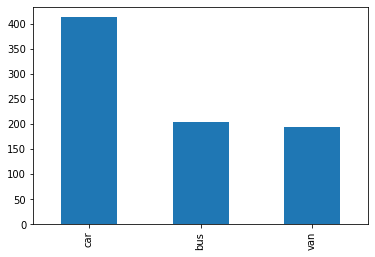

In [35]:
pd.value_counts(dataframe["class"]).plot(kind="bar")

In [34]:
dataframe.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# 2.Understanding the attributes - Find relationships between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

### Observation- From the above correlation table we can conclude the following points:
1.Compactness is highly correlated with distance_circularity, scatter_ratio, pr.axis_rectangularity, scaled_variance.
2.Scatter ratio is in strong negative correlation to elongatedness.
3.There are a lot of variables having a strong correlation with each other. It means chances of multicolinarity are very high in this data. So we should try to reduce our data dimensions before performing the analysis.

In [36]:
dataframe.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.688130,0.090557,0.150369,0.814026,-0.788051,0.814227,0.674902,0.764386,0.820240,0.581405,-0.258437,0.231648,0.168384,0.296195,0.372806
circularity,0.689885,1.000000,0.797704,0.623950,0.155023,0.251619,0.858149,-0.825108,0.856137,0.965366,0.806108,0.850932,0.935594,0.049070,0.141726,-0.001975,-0.113902,0.049331
distance_circularity,0.789955,0.797704,1.000000,0.771404,0.163386,0.265591,0.909023,-0.912713,0.897261,0.773459,0.865683,0.891789,0.705689,-0.238145,0.110280,0.277851,0.145258,0.343228
radius_ratio,0.688130,0.623950,0.771404,1.000000,0.667375,0.452460,0.743470,-0.795761,0.716210,0.570478,0.806788,0.731773,0.544636,-0.175348,0.044693,0.178079,0.375591,0.470895
pr.axis_aspect_ratio,0.090557,0.155023,0.163386,0.667375,1.000000,0.652093,0.113696,-0.191193,0.086992,0.133553,0.290375,0.100668,0.135663,0.173060,-0.059244,-0.040769,0.229702,0.257566
max.length_aspect_ratio,0.150369,0.251619,0.265591,0.452460,0.652093,1.000000,0.171445,-0.183242,0.167514,0.309180,0.331124,0.150069,0.197179,0.308329,0.016461,0.041210,-0.030543,0.139283
scatter_ratio,0.814026,0.858149,0.909023,0.743470,0.113696,0.171445,1.000000,-0.973413,0.991992,0.808154,0.950067,0.996396,0.795748,-0.045632,0.070118,0.227375,0.009967,0.138424
elongatedness,-0.788051,-0.825108,-0.912713,-0.795761,-0.191193,-0.183242,-0.973413,1.000000,-0.950345,-0.771099,-0.937846,-0.956858,-0.761563,0.119750,-0.046621,-0.201325,-0.117568,-0.233408
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.716210,0.086992,0.167514,0.991992,-0.950345,1.000000,0.811979,0.935653,0.992119,0.792895,-0.033769,0.078701,0.231171,-0.017383,0.117202
max.length_rectangularity,0.674902,0.965366,0.773459,0.570478,0.133553,0.309180,0.808154,-0.771099,0.811979,1.000000,0.744760,0.796230,0.865240,0.031098,0.130356,0.013045,-0.108019,0.086792


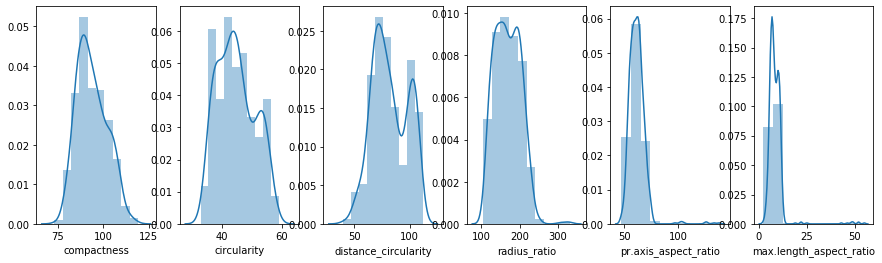

In [33]:
#Let us use seaborn distplot to analyze the distribution of our columns
f, ax = plt.subplots(1, 6, figsize=(15,4))
vis1 = sns.distplot(dataframe["compactness"],bins=10, ax= ax[0])
vis2 = sns.distplot(dataframe["circularity"],bins=10, ax=ax[1])
vis3 = sns.distplot(dataframe["distance_circularity"],bins=10, ax= ax[2])
vis4 = sns.distplot(dataframe["radius_ratio"],bins=10, ax=ax[3])
vis5 = sns.distplot(dataframe["pr.axis_aspect_ratio"],bins=10, ax=ax[4])
vis6 = sns.distplot(dataframe["max.length_aspect_ratio"],bins=10, ax=ax[5])
f.savefig('subplot.png')

# 3.Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [12]:
# we separate the target variable (class) and save it in the y variable. Also the X contains the independant variables.
X = dataframe.iloc[:,0:18].values
y = dataframe.iloc[:,18].values

In [13]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [14]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

# 4.Train a support vector machine using the train set and get the accuracy on the test set

In [15]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_sd, y_train)
print ('Before PCA score', clf.score(X_test_sd, y_test))

Before PCA score 0.9570552147239264


# 6.Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

In [16]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00154083  0.69265271  0.79068714  0.70614818  0.14703275  0.17675895
   0.81141356 -0.78672875  0.81048307  0.67859974  0.76814441  0.81717895
   0.59288604 -0.24587329  0.2331064   0.1566161   0.29895078  0.3585444 ]
 [ 0.69265271  1.00154083  0.80473489  0.63895245  0.18897602  0.27051785
   0.86183852 -0.83193301  0.85860179  0.96531692  0.81122683  0.85271926
   0.9422991   0.04695463  0.13424997 -0.01239352 -0.11637993  0.0432258 ]
 [ 0.79068714  0.80473489  1.00154083  0.7851747   0.21290146  0.29833771
   0.90704269 -0.91266146  0.89462213  0.7810356   0.86779548  0.88893252
   0.71713213 -0.22958526  0.10989015  0.26807135  0.14264479  0.33357443]
 [ 0.70614818  0.63895245  0.7851747   1.00154083  0.69173586  0.46017126
   0.7531609  -0.80356882  0.72563222  0.58662266  0.81128992  0.74073844
   0.5610937  -0.17612698  0.06504646  0.17028709  0.36117125  0.4565932 ]
 [ 0.14703275  0.18897602  0.21290146  0.69173586  1.00154083  0.64779696
   0.1525062

In [19]:
data_new = dataframe.drop(['class'], axis =1)

data_new.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [20]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[-5.56718337e+01, -1.15331883e+02,  2.13150742e+02, ...,
         2.97587224e+02, -1.79690920e+02, -2.46084183e+02],
       [ 1.23458207e+01, -9.70440773e+00,  7.11845077e+00, ...,
         1.37257874e+01,  2.98568833e+00, -1.28410592e+01],
       [ 2.46629597e+01, -3.68419125e+00,  1.81162369e+01, ...,
        -8.03883926e+00, -9.14731784e+00, -1.61703153e+01],
       ...,
       [ 3.05415974e+00, -9.41367034e-01,  1.41733369e+00, ...,
         7.56654870e-01,  5.19327541e+00,  5.62332825e+00],
       [-2.41690755e+00,  3.03503761e+00,  1.89692431e+00, ...,
        -1.36215146e-01,  6.44991450e+00,  4.79522366e+00],
       [-1.33394878e+00, -6.72057133e-02, -1.09714955e+00, ...,
        -9.82354811e-01,  1.55749267e+00,  5.33610084e+00]])

# 7.Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier.

In [29]:
# we separate the target variable (class) and save it in the y variable. Also the X contains the independant variables.
X_new = data_new.iloc[:,0:12].values
y_new = dataframe.iloc[:,18].values

In [30]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new,y_new, test_size = 0.2, random_state = 10)

In [31]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_sd1 = StandardScaler().fit_transform(X_train1)
X_test_sd1 = StandardScaler().fit_transform(X_test1)

In [32]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_sd1, y_train1)
print ('After PCA score', clf.score(X_test_sd1, y_test1))

After PCA score 0.9263803680981595


# 8.Compare the accuracy scores and cross-validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings

As we can see, when we trained our model on raw data, the accuracy was 95% and when we trrained our model after performing PCA, accuracy droped to 93%.
After PCA we reduced the dimensionality from 19 to 12, so complexity of model reduced a lot but accuracy reduced by approx 2% only.
So, It is a good approach to use PCA in this dataset.